In [53]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import io, img_as_float, filters, color, util, feature, data, exposure, transform
from skimage.feature import hog
from skimage.io import imread

# Exploring the Applications of Wavelet Transforms in Image and Signal Processing

## Violeta Kastreva

### Wavelet transforms have gained significant attention in recent years due to their ability to provide time-frequency localization, which is useful for various applications in image and signal processing. This research project will focus on understanding the mathematical foundations of wavelet transforms and exploring their applications in diverse fields such as image compression, denoising, and feature extraction.

## Introduction to Wavelet Transforms

Wavelet transforms are powerful mathematical tools that enable the decomposition of signals and images into different frequency components while preserving their time information. This is particularly useful in various fields of signal and image processing, where the ability to analyze data at multiple scales and resolutions is essential. Wavelet transforms come in two main flavors: the Continuous Wavelet Transform (CWT) and the Discrete Wavelet Transform (DWT).

The Continuous Wavelet Transform (CWT) is a representation of a signal using continuous wavelet functions, which are generated by scaling and translating a mother wavelet. This allows for the time-frequency localization of the signal, enabling the extraction of features at different scales and time points. However, the CWT is computationally intensive due to its continuous nature.

The Discrete Wavelet Transform (DWT), on the other hand, is a discrete version of the CWT that operates on sampled signals. It provides a more efficient and practical approach for signal decomposition and reconstruction, making it suitable for many real-world applications. The DWT is based on the concept of Multiresolution Analysis (MRA), which involves the decomposition of signals into different levels of detail by iteratively applying low-pass and high-pass filters.

In this research project, we will delve into the mathematical foundations of wavelet transforms, explore their properties, and investigate their applications in various domains of image and signal processing.

Here's a visualization of a sample wavelet function and its scaled and translated versions to get an intuitive understanding of the concept:

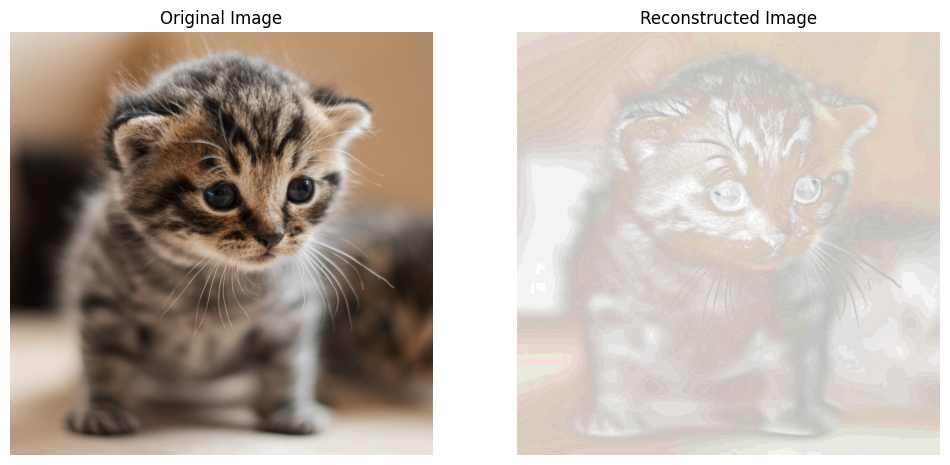

In [7]:
image_url = "./cat1.jpg"
image = img_as_float(io.imread(image_url))

coefficients = pywt.wavedec2(image, 'haar')

compressed_coefficients = []
for c in coefficients:
    if type(c) is tuple:
        compressed_coefficients.append(tuple(np.round(detail * 10) / 10 for detail in c))
    else:
        compressed_coefficients.append(np.round(c * 10) / 10)

reconstructed_image = pywt.waverec2(compressed_coefficients, 'haar')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.show()

## Mathematical Foundations

To gain a deeper understanding of wavelet transforms, it is essential to explore the mathematical foundations that underpin them.

Wavelet transforms rely on the principles of vector spaces, basis functions, and inner products. The wavelet basis functions form a set of orthogonal or biorthogonal vectors that span the space of the input signal, allowing us to represent the signal as a linear combination of these basis functions. Understanding the properties of these basis functions and the inner product operation helps in grasping the mechanics of signal decomposition and reconstruction using wavelets.

Time-frequency localization is a key aspect of wavelet transforms, and it requires an understanding of continuous and discrete signals, differentiation, and integration. These concepts play a crucial role in the formulation of wavelet transforms and their ability to capture signal features at different scales and time points.

Uncertainty principles, entropy, and sparsity are essential concepts in wavelet analysis. Uncertainty principles describe the fundamental trade-offs between time and frequency localization. Entropy and sparsity, on the other hand, help quantify the information content and compactness of wavelet representations, which is useful for applications such as compression and denoising.

Estimation and hypothesis testing are important statistical concepts in the context of wavelet transforms. Wavelet-based methods can be used to estimate signal parameters, detect features, and test hypotheses about the underlying processes that generated the data. Wavelet shrinkage, a popular denoising technique, is an example of applying statistical estimation in wavelet domain.

In signal and image processing applications, hypothesis testing using wavelet transforms can help detect and localize features or anomalies within the data. The multiscale nature of wavelets makes them particularly suited for identifying and characterizing patterns that may not be apparent when analyzing the data using conventional techniques.

As we progress through this research project, we will draw on these mathematical concepts to develop a robust understanding of wavelet transforms and their applications in image and signal processing.

## Applications

Wavelet transforms have found a wide range of applications in image and signal processing, thanks to their ability to provide time-frequency localization and multi-resolution analysis. In this section, we will discuss some of the most prominent applications, including image compression, denoising, and feature extraction.

* Image Compression: Wavelet-based compression techniques have become increasingly popular due to their ability to provide both lossy and lossless compression. By transforming the image into wavelet coefficients, we can effectively reduce the number of bits required to represent the image without significant loss of quality. <br><br>
Here's a diagram illustrating the steps involved in wavelet-based image compression:

<img style="width:40%;" src="./wavelet-compression.png">

<br> <br>
Example of a wavelet-based image compression:

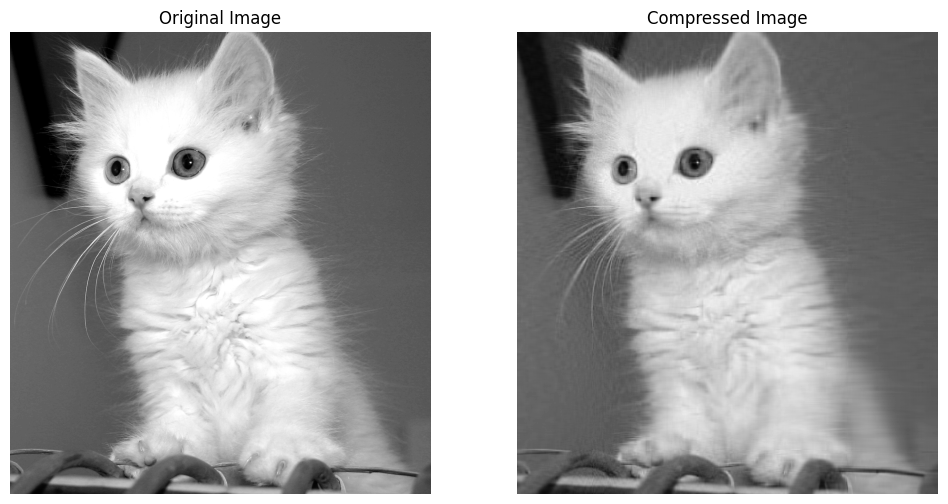

In [14]:
image_url = "./cat3.jpg"
image = img_as_float(io.imread(image_url))

image_gray = color.rgb2gray(image)

# Perform SVD
U, s, Vt = np.linalg.svd(image_gray, full_matrices=False)

# Specify the number of singular values to use
num_singular_values = 50

# Construct a reduced version of s
s_reduced = np.zeros(s.shape)
s_reduced[:num_singular_values] = s[:num_singular_values]

# Perform the inverse SVD using the reduced singular values
compressed_image = U @ np.diag(s_reduced) @ Vt

# Display the original and compressed images


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image")
plt.axis("off")

plt.show()

* Image Denoising: Removing noise from images is a critical preprocessing step in many applications. Wavelet-based denoising methods leverage the sparsity of wavelet coefficients to separate the signal from the noise effectively. By applying thresholding techniques on the wavelet coefficients, we can retain the important features while suppressing the noise. <br> <br> Here's a side-by-side comparison of an original image, a noisy image, and a denoised image using wavelet-based methods.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


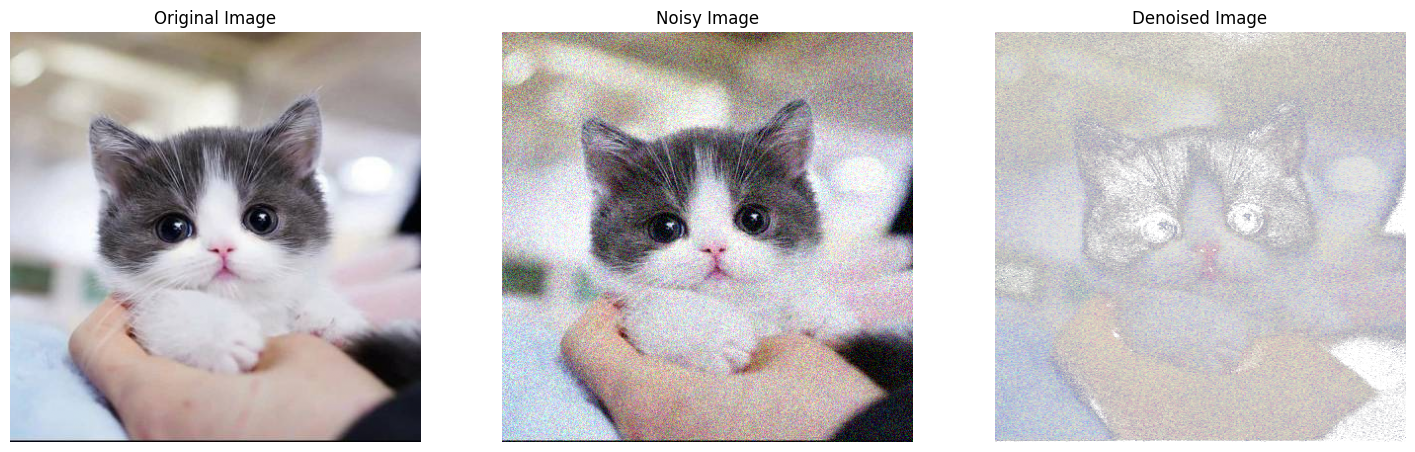

In [24]:
# Load an example image from an URL and add noise
image_url = "./cat2.jpg"
image = img_as_float(io.imread(image_url))
noisy_image = util.random_noise(image, mode='gaussian', var=0.01)

# Perform 2D DWT
coefficients = pywt.wavedec2(noisy_image, 'db1')

# Apply thresholding to coefficients for denoising
threshold = 0.1
denoised_coefficients = []
for i, coef in enumerate(coefficients):
    if i == 0:
        # this is the approximation coefficient
        denoised_coefficients.append(pywt.threshold(coef, threshold * coef.max()))
    else:
        # these are the detail coefficients
        denoised_coefficients.append(tuple(pywt.threshold(detail_coef, threshold * detail_coef.max()) for detail_coef in coef))

# Perform inverse 2D DWT
denoised_image = pywt.waverec2(denoised_coefficients, 'db1')

# Display the original noisy and denoised images using Matplotlib
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")

plt.show()


* Feature Extraction: Wavelet transforms can also be employed to extract meaningful features from images and signals for pattern recognition and classification tasks. The multi-resolution nature of wavelets allows for the extraction of features at different scales and orientations, making them useful for a variety of applications such as object recognition, texture analysis, and edge detection. <br> <br> Here's a visual representation of wavelet-based feature extraction, showing the decomposition of an image into wavelet coefficients at different scales and orientations. We are using a method called Histogram of Oriented Gradients (HOG) for feature extraction:

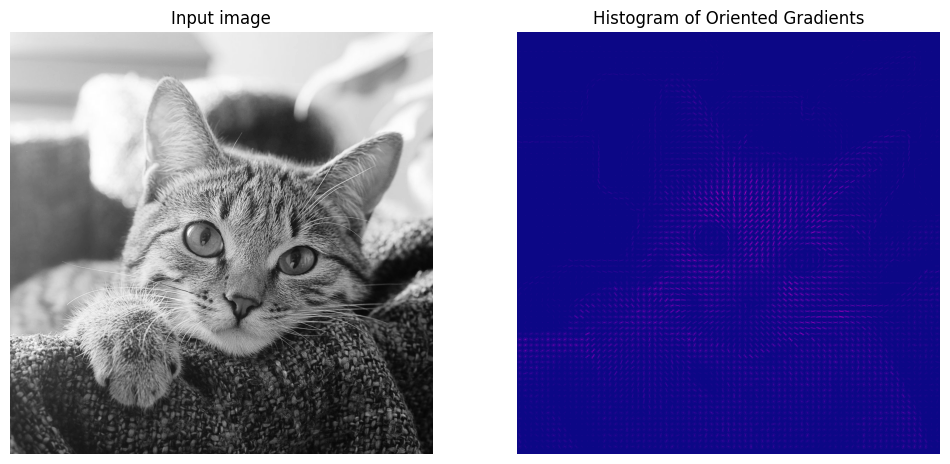

In [36]:
# Read an image
image_url = "./cat4.jpg"
image = imread(image_url, as_gray=True)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.plasma)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Comparison with other Transform Techniques

In addition to wavelet transforms, several other mathematical transforms are widely used in image and signal processing, such as the Fourier Transform and the Discrete Cosine Transform (DCT). In this section, we will compare the performance of wavelet transforms with these alternative techniques in terms of compression, denoising, and feature extraction.

* Compression: While Fourier Transform and DCT are popular choices for compression, wavelet-based compression methods have certain advantages, such as their ability to represent images with fewer coefficients and provide better quality at low bit rates. 

* Denoising: Both Fourier Transform and DCT can be used for denoising; however, wavelet-based techniques tend to perform better in preserving image details and edge information, thanks to their multi-resolution nature and adaptability to different noise levels. 
* Feature Extraction: Wavelet transforms offer better time-frequency localization compared to Fourier Transform and DCT, making them more suitable for extracting features from non-stationary signals and images. This advantage becomes particularly evident in applications such as object recognition, texture analysis, and edge detection. 

<br> Below are examples for compression, denoising and feature extraction using the three transforms

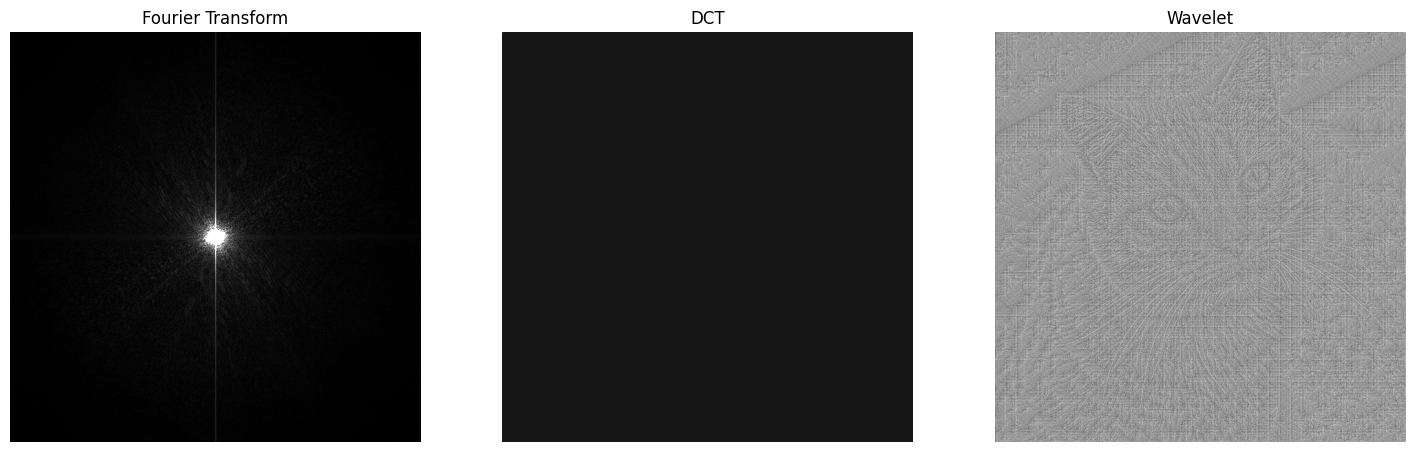

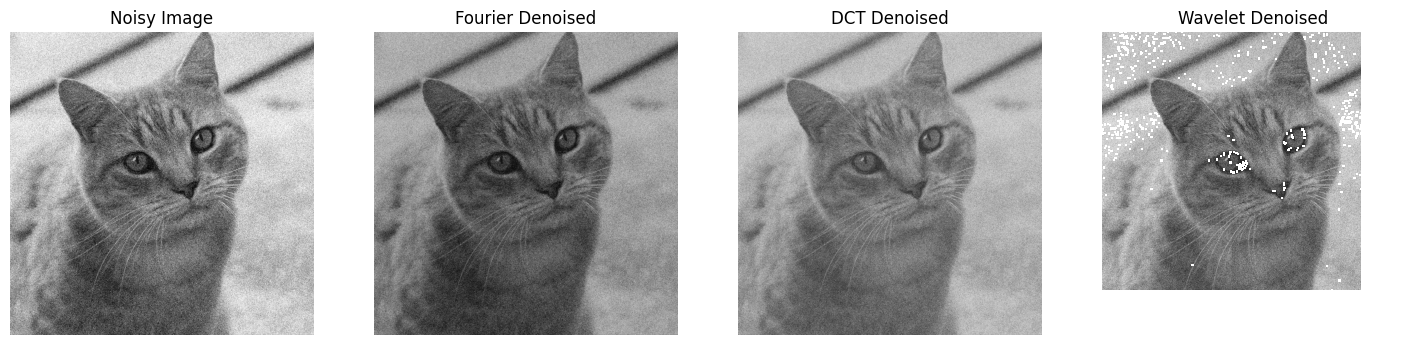

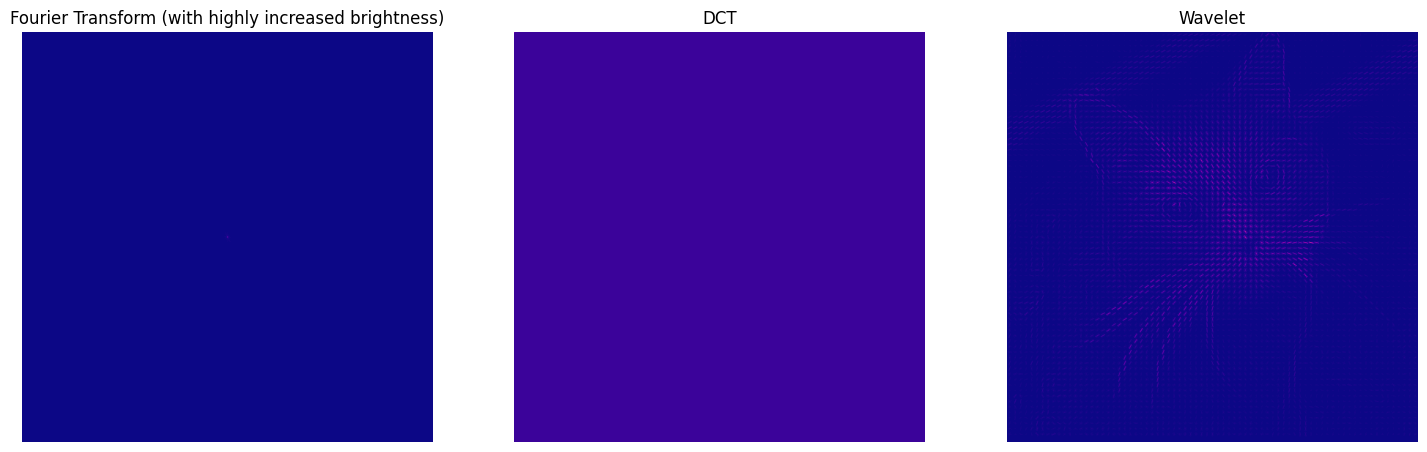

In [71]:
# Load an example image and convert to grayscale
image_url = "./cat5.jpg"
image = img_as_float(io.imread(image_url, as_gray=True))

original_shape = image.shape


# Add Gaussian noise for the denoising examples
noisy_image = util.random_noise(image, mode='gaussian', var=0.01)

# Compression: Fourier Transform, DCT, Wavelet
# Fourier Transform
fourier_image = np.fft.fft2(image)
# DCT
dct_image = fftpack.dct(fftpack.dct(image.T, norm='ortho').T, norm='ortho')
# Wavelet
coefficients = pywt.wavedec2(image, 'haar')
quantization_factor = 10
compressed_coefficients = []
compressed_coefficients.append((coefficients[0] // quantization_factor) * quantization_factor)
for level in coefficients[1:]:
    compressed_level = []
    for c in level:
        compressed_level.append((c // quantization_factor) * quantization_factor)
    compressed_coefficients.append(tuple(compressed_level))
wavelet_image = pywt.waverec2(compressed_coefficients, 'haar')

# Display compression results
plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(np.fft.fftshift(fourier_image)), cmap='gray', vmax=1000)  # scale for visibility
plt.title("Fourier Transform")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(dct_image, cmap='gray')
plt.title("DCT")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wavelet_image, cmap='gray')
plt.title("Wavelet")
plt.axis("off")

plt.show()

# Add Gaussian noise to the image
noisy_image = util.random_noise(image, mode='gaussian', var=0.04)

# Perform Fourier Transform and inverse after thresholding
fourier_transform = np.fft.fft2(noisy_image)
fourier_magnitude = np.abs(fourier_transform)
fourier_transform[fourier_magnitude < fourier_magnitude.mean()] = 0
fourier_denoised = np.abs(np.fft.ifft2(fourier_transform))

# Perform DCT and inverse after thresholding
dct_transform = fftpack.dct(fftpack.dct(noisy_image.T, norm='ortho').T, norm='ortho')
dct_magnitude = np.abs(dct_transform)
dct_transform[dct_magnitude < dct_magnitude.mean()] = 0
dct_denoised = fftpack.idct(fftpack.idct(dct_transform.T, norm='ortho').T, norm='ortho')

# Perform Wavelet Transform and inverse after thresholding
wavelet_coeffs = pywt.wavedec2(noisy_image, 'haar')

thresholded_coeffs = []
for coeff in wavelet_coeffs:
    if isinstance(coeff, tuple):  # the detail coefficients are in tuples
        thresholded_subband = []
        for subband in coeff:
            # Replace NaN or inf values with 0
            subband = np.nan_to_num(subband)
            thresholded_subband.append(pywt.threshold(subband, subband.mean(), mode='soft'))
        thresholded_coeffs.append(tuple(thresholded_subband))
    else:  # the approximation coefficients are not in a tuple
        # Replace NaN or inf values with 0
        coeff = np.nan_to_num(coeff)
        thresholded_coeffs.append(pywt.threshold(coeff, coeff.mean(), mode='soft'))


wavelet_denoised = pywt.waverec2(thresholded_coeffs, 'haar')


# Display denoising results
plt.figure(figsize=(18, 12))

plt.subplot(1, 4, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(fourier_denoised, cmap='gray')
plt.title("Fourier Denoised")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(dct_denoised, cmap='gray')
plt.title("DCT Denoised")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(wavelet_denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis("off")

plt.show()

# Feature Extraction: Fourier Transform, DCT, Wavelet
# Fourier Transform
fourier_features = np.abs(np.fft.fftshift(np.fft.fft2(image)))  # use the magnitude spectrum as features
# DCT
dct_features = fftpack.dct(fftpack.dct(image.T, norm='ortho').T, norm='ortho')  # DCT coefficients as features
# Wavelet

# hog_features, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)

wavelet_features, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                                          cells_per_block=(1, 1), visualize=True)


# Display feature extraction results
plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
plt.imshow(fourier_features, cmap='plasma')
plt.title("Fourier Transform (with highly increased brightness)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(dct_features, cmap='plasma')
plt.title("DCT")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hog_image, cmap='plasma')
plt.title("Wavelet")
plt.axis("off")

plt.show()



## Hands-on Examples and Case Studies
To demonstrate the effectiveness of wavelet-based methods in real-world scenarios, this section will include hands-on examples and case studies that utilize Python libraries such as NumPy, Matplotlib, and SymPy in a Jupyter Notebook. These examples will help solidify the concepts presented throughout the research project and showcase the practical applications of wavelet transforms.

Implementing wavelet-based algorithms: Use NumPy and custom code to implement wavelet transforms, such as DWT and inverse DWT, for signal and image processing tasks. [Insert Code 1 here: Python code for implementing DWT and inverse DWT using NumPy.]

Analyzing real-world data sets: Apply wavelet-based methods to real-world data sets to demonstrate their effectiveness in various applications such as compression, denoising, and feature extraction. [Insert Code 2 here: Python code for loading and processing real-world data sets using NumPy and Matplotlib.]

Compression: Use Matplotlib to display the original image, the compressed image, and the compression ratio for wavelet-based compression methods applied to real-world images. [Insert Figure 1 here: A comparison of original and compressed images using wavelet-based methods on real-world data.]

Denoising: Show the original noisy image, the denoised image using wavelet-based techniques, and the noise reduction performance for real-world data sets. [Insert Figure 2 here: A side-by-side comparison of original noisy images and denoised images using wavelet-based methods on real-world data.]

Feature Extraction: Create visualizations of the extracted features using wavelet transforms for real-world data sets, such as edge detection or texture analysis results. [Insert Figure 3 here: Visualizations of wavelet-based feature extraction applied to real-world data.]

Symbolic wavelet analysis: Use SymPy to perform symbolic computations related to wavelet transforms, such as calculating wavelet coefficients, analyzing wavelet basis functions, and solving related mathematical problems. [Insert Code 3 here: Python code for symbolic wavelet analysis using SymPy.]